# Visualizing Chipotle's Data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os

In [4]:
#Import the necessary data set.
os.chdir(r'D:\Sagun Shakya\Python\Data Sets\Chipotle-data_analysis-example-master')
chipo = pd.read_csv('chipotle.tsv', sep = '\t')

In [5]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [6]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.6+ KB


In [22]:
chipo.shape

(4622, 5)

In [7]:
chipo.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [8]:
chipo.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [10]:
chipo.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

### The item_price is an object. we need to change it into floating point.

In [20]:
chipo['item_price'] = chipo['item_price'].str.replace('$', '')
chipo['item_price'] = chipo['item_price'].astype(float)

In [23]:
chipo.tail(10)

,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",9.25
4613,1831,1,Chips,NaN,2.15
4614,1831,1,Bottled Water,NaN,1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",8.75
4616,1832,1,Chips and Guacamole,NaN,4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",8.75


### Total Sales.

In [24]:
chipo['item_price'].sum()

34500.16

# Having fun with colors.

### Storing random colors using Hexadecimal codes in a list.

In [71]:
import random
colors_list = [] 
n = chipo['item_name'].value_counts().count()  #No. of colors to be generated.

#Storing random hexadecimal color codes in a list.
for ii in range(n):
    random_number = random.randint(0,16777215)
    hex_number = str(hex(random_number))

    hex_number ='#'+ hex_number[2:]
    
    colors_list.append(hex_number)
    
print(colors_list)

['#1cee7f', '#332a76', '#98b224', '#9da72f', '#c8954f', '#b7a191', '#62a7f5', '#9b3282', '#652a48', '#3a806a', '#426585', '#98fc26', '#4c5f75', '#8fd14c', '#80828d', '#574874', '#a4cbd4', '#af2713', '#9f18c', '#794fb9', '#7f2a3c', '#63008', '#51be55', '#230bf3', '#a7faa7', '#616623', '#b3af60', '#c0caf3', '#751944', '#6b675f', '#8ef2f5', '#2a8079', '#248764', '#51dd1c', '#10d165', '#ce0e1b', '#16d871', '#4f235c', '#f8dc8b', '#deda7f', '#975f4e', '#9d6d58', '#ab2715', '#b2de43', '#f455c7', '#d78484', '#d55e69', '#d45d1b', '#15adb3', '#cf6460']


### To find which item was the most frequently bought (coloured in red).

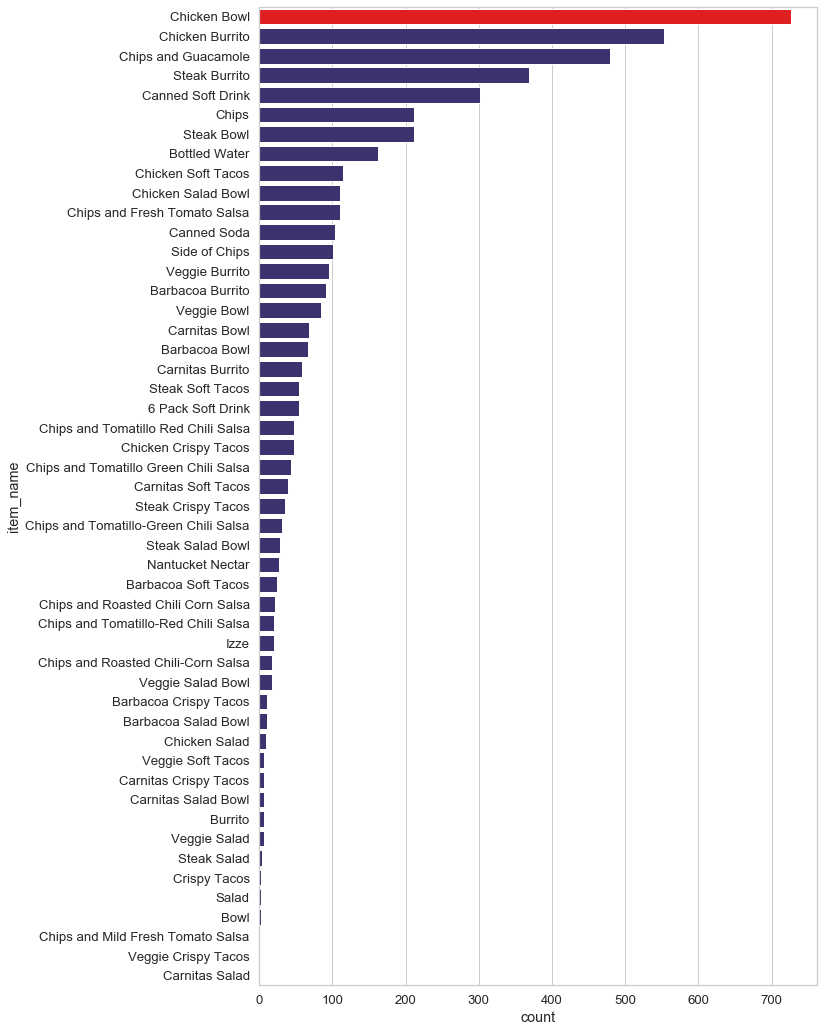

In [93]:
max_value = chipo['item_name'].value_counts().max()  #Max value of the frequency.

jj = np.random.randint( len(colors_list))  #Random index from the colors_list.
clrs = [colors_list[jj] if (ii < max_value) else 'red' for ii in chipo['item_name'].value_counts() ]

plt.figure( figsize = (10,18) )
sns.set(style = 'whitegrid',  font_scale = 1.2)
sns.set_palette(sns.color_palette(clrs))

sns.countplot(y = chipo['item_name'], order = chipo['item_name'].value_counts().index)
plt.show()


#### Reference to some blocks of code used above.

In [70]:
chipo['item_name'].value_counts().count()

50

In [94]:
chipo['item_name'].value_counts()    #sort = True

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Chips                                    211
Steak Bowl                               211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [95]:
chipo['item_name'].value_counts().index

Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito', 'Canned Soft Drink', 'Chips', 'Steak Bowl',
       'Bottled Water', 'Chicken Soft Tacos', 'Chicken Salad Bowl',
       'Chips and Fresh Tomato Salsa', 'Canned Soda', 'Side of Chips',
       'Veggie Burrito', 'Barbacoa Burrito', 'Veggie Bowl', 'Carnitas Bowl',
       'Barbacoa Bowl', 'Carnitas Burrito', 'Steak Soft Tacos',
       '6 Pack Soft Drink', 'Chips and Tomatillo Red Chili Salsa',
       'Chicken Crispy Tacos', 'Chips and Tomatillo Green Chili Salsa',
       'Carnitas Soft Tacos', 'Steak Crispy Tacos',
       'Chips and Tomatillo-Green Chili Salsa', 'Steak Salad Bowl',
       'Nantucket Nectar', 'Barbacoa Soft Tacos',
       'Chips and Roasted Chili Corn Salsa',
       'Chips and Tomatillo-Red Chili Salsa', 'Izze',
       'Chips and Roasted Chili-Corn Salsa', 'Veggie Salad Bowl',
       'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl', 'Chicken Salad',
       'Veggie Soft Tacos', 'Carnitas Cri

### Create a histogram of the top 5 items bought.

In [109]:
top5 = chipo['item_name'].value_counts().head()
top5.values

array([726, 553, 479, 368, 301], dtype=int64)

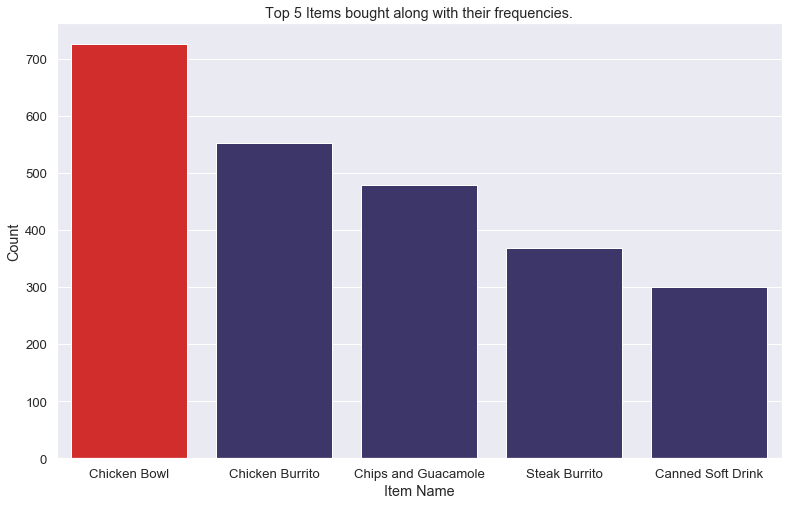

In [125]:
plt.figure(figsize = (13,8))
sns.set(style = 'darkgrid',  font_scale = 1.2)
sns.set_palette(sns.color_palette(clrs))

sns.barplot(x = top5.index, y = top5.values, saturation = 0.65)

plt.xlabel('Item Name')
plt.ylabel('Count')
plt.title('Top 5 Items bought along with their frequencies.')
plt.show()

###  Create a scatterplot with the number of items ordered per order price.
- Hint: Price should be in the X-axis and Items ordered in the Y-axis.

In [129]:
qtyVSprice = chipo.groupby('order_id').sum()
qtyVSprice.head(10)

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
6,2,17.50
7,2,15.70
8,2,10.88
9,3,10.67


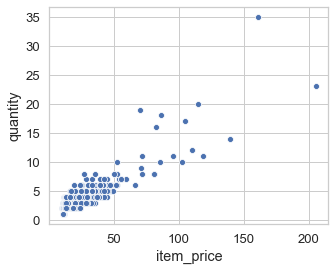

In [147]:
plt.figure(figsize = (5,4))
sns.set(style = 'whitegrid', font_scale = 1.2)
sns.scatterplot(x = qtyVSprice['item_price'], y = qtyVSprice['quantity'] )
plt.show()

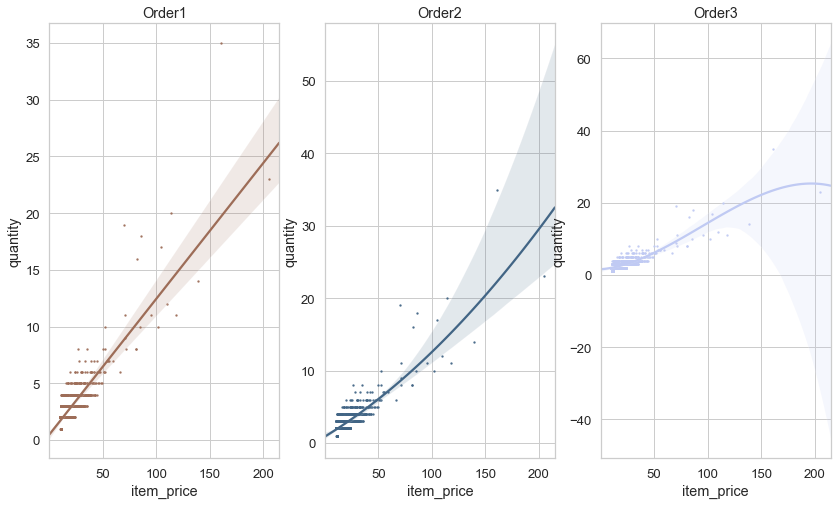

In [144]:
plt.figure(figsize = (14,8))
sns.set(style = 'whitegrid', font_scale = 1.2)
for ii in range(1,3+1):
    plt.subplot(1,3,ii)
    
    sns.regplot(x = qtyVSprice['item_price'], y = qtyVSprice['quantity'],
                marker = 'o', scatter_kws={'s':2}, order = ii,
                color = colors_list[np.random.randint( len(colors_list))] )
    plt.title('Order' + str(ii))
plt.show()


# The End.